# Imports

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from odds_optimized import DyCF, LevelsetPlotter

# Parameters

In [2]:
d = 2  # Data dimension
n = 8  # Degree of the polynomial basis
N = 1000  # Number of samples

# Data

In [3]:
np.random.seed(42)

N = 2 * (N//2)  # Ensure N is even for two normal distributions

# Generate the "T" rotated data
norm_1 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 50]], size=N//2)
norm_1 = np.dot(norm_1, np.array([[np.cos(np.pi / 4), -np.sin(np.pi / 4)], [np.sin(np.pi / 4), np.cos(np.pi / 4)]])) + np.array([[20, 20]])
norm_2 = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 50]], size=N//2)
norm_2 = np.dot(norm_2, np.array([[-np.cos(np.pi / 4), -np.sin(np.pi / 4)], [np.sin(np.pi / 4), -np.cos(np.pi / 4)]]))
data = np.concatenate([norm_1, norm_2])

# Scale the data for better performance of DyCF
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Fit the Christoffel function

In [4]:
dycf = DyCF(n, polynomial_basis="optimized_monomials")
dycf.fit(data)

# Plot the level set

In [5]:
plotter = LevelsetPlotter(dycf)

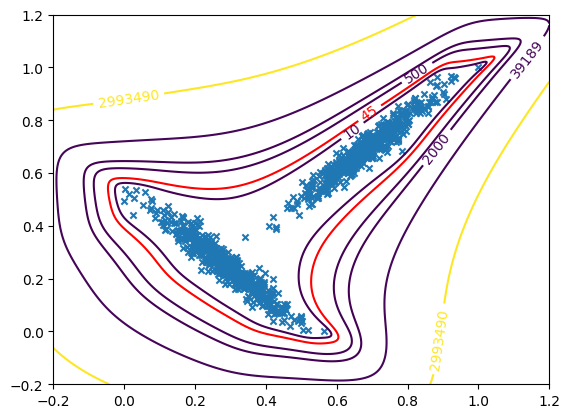

In [6]:
plotter.plot(data, n_x1=500, n_x2=500, levels=[10, 500, 2000], percentiles=[50, 75])
# n_x1 and n_x2 control the resolution of the grid for plotting
# You can adjust the levels and percentiles as needed
# More information can be found in the odds_optimized.plotter.LevelsetPlotter.plot documentation